1.493909668204751e+24


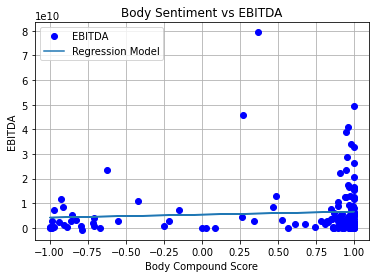

[[3.11582133]
 [1.3677935 ]]
333244.1255454289


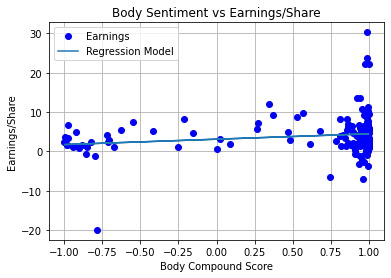

[[23.34879116]
 [ 4.86307488]]
43564606.88498048


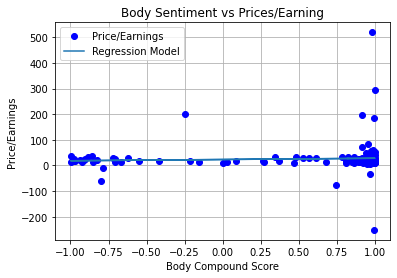

[[ 4.44224499]
 [-0.35715982]]
184525.1937629285


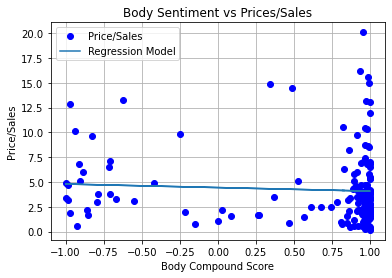

In [157]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt




import pandas as pd 

data = pd.read_csv("sa.csv")  


titleSentiments = []

data.head()

for i in data["Title Compound Score"]: # add categorical variables to sentiment analysis csv
    if i >= 0.05:
        titleSentiments.append("positive")
    elif i <= -0.05:
        titleSentiments.append("negative")
    else:
        titleSentiments.append("neutral")
data["titleSentiments"] = titleSentiments

bodySentiment = []


for i in data["Body Compound Score"]:
    if i > 0.0:
        bodySentiment.append("positive")
    elif i < 0.0:
        bodySentiment.append("negative")
    else:
        bodySentiment.append("neutral")
data["bodySentiment"] = bodySentiment


financialData = pd.read_csv("s-and-p-500-companies-financials_zip/data/constituents-financials_csv.csv")
financialData.dropna()
symbols = financialData["Symbol"].tolist()



data['Body S&P 500 + GME Tickers'] = data['Body S&P 500 + GME Tickers'].apply(lambda x: x.split(','))




list2 = [""] * len(symbols)





for i in range(len(data)): # match ticker symbols from sentment csv to financial csv and transferr sentiment body text sentiment data to the financial csv
    for j in range(len(data['Body S&P 500 + GME Tickers'][i])):
        if data['Body S&P 500 + GME Tickers'][i][j] in symbols:
            
            compound = data.iloc[i]['Body Compound Score']
            index = symbols.index(data['Body S&P 500 + GME Tickers'][i][j])
            list2[index] = compound





financialData['bodyCompoundScore'] = list2



nan_value = float("NaN")
financialData.replace("", nan_value, inplace=True)


    
financialData.dropna(subset = ["bodyCompoundScore"], inplace=True)

	





def cost(x,y,theta): # sum of square error cost function
    predict = np.dot(x,theta)
    return (1/2 * (len(y)) * np.sum(np.square(predict - y)))

def gradient(x,y,theta, iterations=1000, learning_rate=0.01): ## gradient descent to find optimal theta
    
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predict = np.dot(x,theta)
        theta = theta - (1/len(y)) * learning_rate * (x.T.dot(predict - y))
        cost_history[i] = cost(x,y,theta)
    return theta, cost_history

theta = np.zeros([2,1])
X = financialData[['bodyCompoundScore']].values
y = financialData['EBITDA'].values.reshape(-1,1)

Xnorm = X.copy() # feature normalization
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx) 


m = np.size(y)
X = X.reshape([len(financialData),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(J[-1]) # prints latest cost 


plt.plot(X,y,'bo') # create plot
plt.plot(X,x@theta,'-')
plt.ylabel('EBITDA')
plt.xlabel('Body Compound Score')
plt.title('Body Sentiment vs EBITDA')
plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()





theta = np.zeros([2,1])
X = financialData[['bodyCompoundScore']].values
y = financialData['Earnings/Share'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Earnings/Share')
plt.xlabel('Body Compound Score')

plt.legend(['Regular Data Points','Regression Model'])
plt.title('Body Sentiment vs Earnings/Share')

plt.grid()
plt.show()

theta = np.zeros([2,1])
X = financialData[['bodyCompoundScore']].values
y = financialData['Price/Earnings'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Price/Earnings')
plt.xlabel('Body Compound Score')
plt.title('Body Sentiment vs Prices/Earning')

plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()


theta = np.zeros([2,1])
X = financialData[['bodyCompoundScore']].values
y = financialData['Price/Sales'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Price/Sales')
plt.xlabel('Body Compound Score')
plt.title('Body Sentiment vs Prices/Sales')

plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()








5.9891138676278905e+23


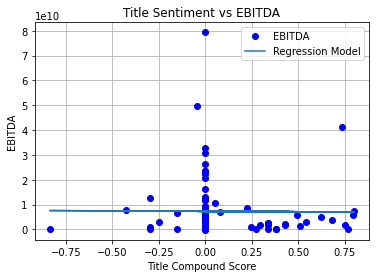

[[ 4.10035404]
 [-1.34762119]]
71123.12120255029


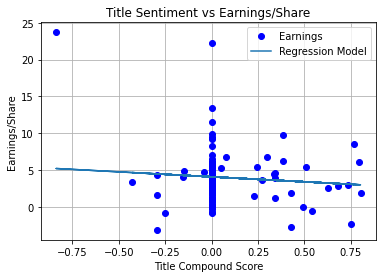

[[32.11191608]
 [-6.36773939]]
17820868.16566499


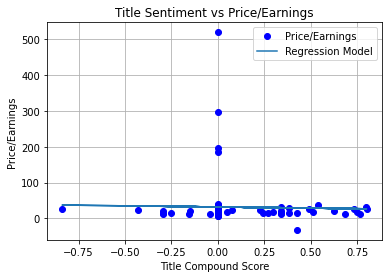

[[3.71110722]
 [0.512154  ]]
49169.6872552415


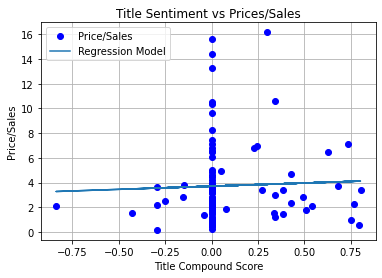

In [158]:
financialData2 = pd.read_csv("s-and-p-500-companies-financials_zip/data/constituents-financials_csv.csv")
financialData2.dropna()

list3 = [""] * len(symbols)


data['Title S&P 500 + GME Tickers'] = data['Title S&P 500 + GME Tickers'].apply(lambda x: x.split(','))


for i in range(len(data)): # match ticker symbols from sentment csv to financial csv and transferr sentiment title text sentiment data to the financial csv
    for j in range(len(data['Title S&P 500 + GME Tickers'][i])):
        if data['Title S&P 500 + GME Tickers'][i][j] in symbols:
            
            titlecompound = data.iloc[i]['Title Compound Score']
            index = symbols.index(data['Title S&P 500 + GME Tickers'][i][j])
            list3[index] = titlecompound


financialData2['titleCompoundScore'] = list3



nan_value = float("NaN")
financialData2.replace("", nan_value, inplace=True)


    
financialData2.dropna(subset = ["titleCompoundScore"], inplace=True)


theta = np.zeros([2,1])
X = financialData2[['titleCompoundScore']].values
y = financialData2['EBITDA'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y) # #initization of paramters found and plotting of graphs from https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e
X = X.reshape([len(financialData2),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('EBITDA')
plt.title('Title Sentiment vs EBITDA')
plt.xlabel('Title Compound Score')
plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()





theta = np.zeros([2,1])
X = financialData2[['titleCompoundScore']].values
y = financialData2['Earnings/Share'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData2),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Earnings/Share')
plt.xlabel('Title Compound Score')
plt.title('Title Sentiment vs Earnings/Share')

plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()

theta = np.zeros([2,1])
X = financialData2[['titleCompoundScore']].values
y = financialData2['Price/Earnings'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData2),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Price/Earnings')
plt.xlabel('Title Compound Score')
plt.title('Title Sentiment vs Price/Earnings')
plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()


theta = np.zeros([2,1])
X = financialData2[['titleCompoundScore']].values
y = financialData2['Price/Sales'].values.reshape(-1,1)

Xnorm = X.copy()
minx = np.min(X)
maxx = np.max(X)
Xnorm = (X-minx)/(maxx-minx)


m = np.size(y)
X = X.reshape([len(financialData2),1])
x = np.hstack([np.ones_like(X),X])
theta = np.zeros([2,1])

theta, J = gradient(x,y,theta)
print(theta)
print(J[-1])


plt.plot(X,y,'bo')
plt.plot(X,x@theta,'-')
plt.ylabel('Price/Sales')
plt.xlabel('Title Compound Score')
plt.title('Title Sentiment vs Prices/Sales')
plt.legend(['Regular Data Points','Regression Model'])
plt.grid()
plt.show()


